# Calculate Loss Graph

Must be run using kernel from lsd environment

### Do NOT install tensorflow into lsd_env

In [1]:
!pip install matplotlib
!pip install tensorflow

In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 26.1 MB/s eta 0:00:0000:0100:01
  Using cached contourpy-1.1.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)


In [4]:
import tensorflow as tf
import logging
import os
import matplotlib.pyplot as plt
import numpy as np

# Display Loss Chart

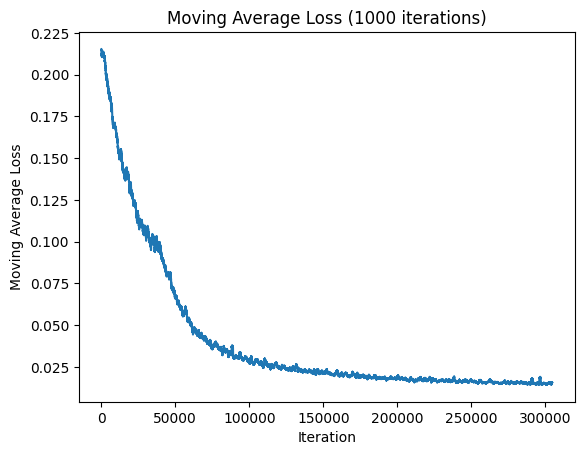

In [25]:
baseline_dir = '/data/lsd_nm_experiments/02_train/3M-APP-SCN/baseline/'
log_dir = os.path.join(baseline_dir, 'log')

# Get a list of log files in the directory
log_files = [file for file in os.listdir(log_dir) if file.startswith('events.out.tfevents')]

step_losses = []  # List to store the step-loss pairs

# Iterate over the log files and extract the losses
for log_file in log_files:
    file_path = os.path.join(log_dir, log_file)
    for event in tf.compat.v1.train.summary_iterator(file_path):
        for value in event.summary.value:
            if value.tag == 'setup01/setup01_eucl_loss':  # Adjust the tag based on your specific logging format
                step = event.step
                loss = value.simple_value
                step_losses.append((step, loss))

# Sort the step-loss pairs based on the step number
step_losses.sort(key=lambda x: x[0])

# Extract the sorted steps and losses
steps = [pair[0] for pair in step_losses]
losses = [pair[1] for pair in step_losses]

# Calculate the moving average
window_size = 1000  # Adjust the window size as needed
moving_avg = np.convolve(losses, np.ones(window_size)/window_size, mode='valid')


# Create a plot of the moving average
plt.plot(moving_avg)
plt.xlabel('Iteration')
plt.ylabel('Moving Average Loss')
plt.title(f'Moving Average Loss ({window_size} iterations)')
plt.show()

In [19]:
import tensorflow as tf
import os

baseline_dir = '/data/lsd_nm_experiments/02_train/3M-APP-SCN/mtlsd_04/'
log_dir = os.path.join(baseline_dir, 'log')

# Get a list of log files in the directory
log_files = [file for file in os.listdir(log_dir) if file.startswith('events.out.tfevents')]

step_losses = []  # List to store the step-loss pairs

# Iterate over the log files and extract the losses
for log_file in log_files:
    file_path = os.path.join(log_dir, log_file)
    try:
        for event in tf.compat.v1.train.summary_iterator(file_path):
            if hasattr(event, 'summary'):
                # print('summary', event)
                for value in event.summary.value:
                    # print('value', value)
                    if value.tag == 'loss':  # Adjust the tag based on your specific logging format
                        step = event.step
                        loss = value.simple_value
                        step_losses.append((step, loss))
    except Exception as e:
        print(f"Error reading {file_path}: {str(e)}")

print(step_losses)


[(400001, 0.014333529397845268), (400002, 0.007292609661817551), (400003, 0.014382613822817802), (400004, 0.006994287949055433), (400005, 0.014911085367202759), (400006, 0.012449067085981369), (400007, 0.009521367959678173), (400008, 0.015826445072889328), (400009, 0.019191531464457512), (400010, 0.018190845847129822), (400011, 0.011116089299321175), (400012, 0.018812036141753197), (400013, 0.011213673278689384), (400014, 0.011889846064150333), (400015, 0.008440103381872177), (400016, 0.0003895603585988283), (400017, 0.00017928684246726334), (400018, 0.008077076636254787), (400019, 0.014761010184884071), (400020, 0.007999365217983723), (400021, 0.010174904018640518), (400022, 0.009971565566956997), (400023, 0.009454199112951756), (400024, 0.015276635996997356), (400025, 0.01855722814798355), (400026, 0.013964546844363213), (400027, 0.0127258924767375), (400028, 0.008408062160015106), (400029, 0.00487806461751461), (400030, 0.014097253791987896), (400031, 0.011119444854557514), (400032,